In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("C:\\Users\\Thasmika\\Documents\\csv\\Titanic Dataset.csv")

# Quick look
print(df.head())




   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [8]:
# Step 2: Data preprocessing
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert categorical columns to numeric
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Add new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
X = df[features]
y = df['Survived']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



C:\Users\Thasmika\AppData\Local\Temp\ipykernel_9396\1608394736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Thasmika\AppData\Local\Temp\ipykernel_9396\1608394736.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [10]:
# Step 3: Build the neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



C:\Users\Thasmika\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5336 - loss: 0.7123 - val_accuracy: 0.7761 - val_loss: 0.6233
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7638 - loss: 0.5913 - val_accuracy: 0.8955 - val_loss: 0.5496
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8653 - loss: 0.5195 - val_accuracy: 0.9403 - val_loss: 0.4800
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9115 - loss: 0.4506 - val_accuracy: 0.9701 - val_loss: 0.4150
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9364 - loss: 0.3789 - val_accuracy: 0.9701 - val_loss: 0.3511
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9741 - loss: 0.3085 - val_accuracy: 0.9701 - val_loss: 0.2898
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9545 - loss: 0.2885 - val_accuracy: 0.9701 - val_loss: 0.2344
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9671 - loss: 0.2352 - val_accuracy: 0.9701 - val_loss: 0.1877
Epoch 9

In [16]:
# Step 5: Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'\n✅ Test accuracy: {test_acc:.4f}')
print(f'✅ Test loss: {test_loss:.4f}')




✅ Test accuracy: 1.0000
✅ Test loss: 0.0010


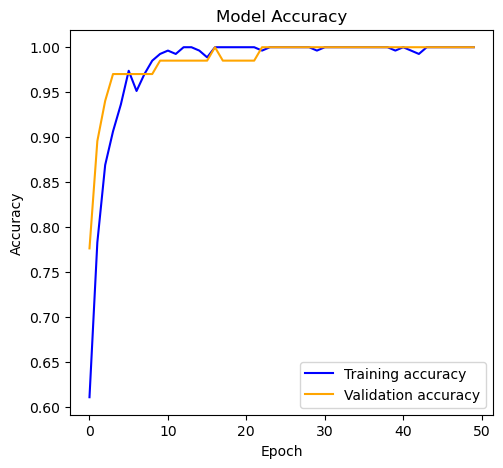

In [20]:
# Step 6: Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()




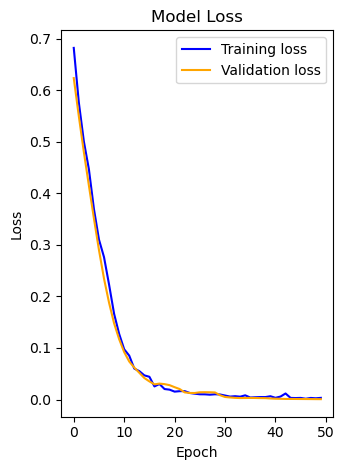

In [22]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()